# √ökol ƒç. 3 - Segmentace z√°kazn√≠k≈Ø e-shopu
**Deadline √∫kolu je uveden na [course pages](https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html).**

Jednou z d≈Øle≈æit√Ωch aplikac√≠ shlukov√°n√≠ je **segmentace z√°kazn√≠k≈Ø** (angl. **customer segmentation**). 

P≈ôedpokl√°dejme, ≈æe m√°me n√°sleduj√≠c√≠ obchodn√≠ √∫daje o prodej√≠ch (resp. n√°kupech z pohledu z√°kazn√≠k≈Ø):
TransactionID - ID n√°kupu,
CustomerID - ID z√°kazn√≠ka, 
Date - datum n√°kupu, 
Total - celkov√° cena n√°kupu.

Chceme naj√≠t segmenty z√°kazn√≠k≈Ø, kte≈ô√≠ se chovaj√≠ podobnƒõ. K tomu je dobr√© informace z jednotliv√Ωch n√°kup≈Ø pro individu√°ln√≠ z√°kazn√≠ky agregovat. Tj. z√≠skat pro ka≈æd√©ho z√°kazn√≠ka jeden ≈ô√°dek.

Popul√°rn√≠m p≈ô√≠stupem je **RFM**, co≈æ znamen√°:

- **R**ecency: Poƒçet dn≈Ø od posledn√≠ho n√°kupu (posledn√≠ datum v datasetu pro dan√©ho z√°kazn√≠ka).
- **F**requency: Poƒçet n√°kup≈Ø. Obƒças se vynech√°vaj√≠ z√°kazn√≠ci s jedin√Ωm n√°kupem. Pro jednoduchost je zde ale nech√°me.
- **M**onetary: Celkov√° suma, kterou dan√Ω z√°kazn√≠k utratil.

## Zdroj dat
Budeme pracovat s daty z jednoho (skoro) vymy≈°len√©ho eshopu, kter√° jsou v p≈ôilo≈æen√©m souboru `eshop.csv`.

## Pokyny k vypracov√°n√≠

Ve v≈°ech bodech zad√°n√≠ uva≈æujte aktu√°ln√≠ datum jako datum posledn√≠ transakce (19. 12. 2015), nikoliv dne≈°ek. Tv√°≈ô√≠me se, ≈æe jde o aktu√°ln√≠ data.

**Z√°kladn√≠ body zad√°n√≠**, za jejich≈æ (poctiv√©) vypracov√°n√≠ z√≠sk√°te **8 bod≈Ø**:
- Vytvo≈ôte `rfm` data frame, kde ka≈æd√Ω ≈ô√°dek odpov√≠d√° jednomu z√°kazn√≠kovi a sloupce (p≈ô√≠znaky) jsou uveden√© v√Ω≈°e.
- Pomoc√≠ algoritmu `K-means` proveƒète shlukov√°n√≠. Nƒõjak√Ωm zp≈Øsobem tak√© odhadnƒõte nejlep≈°√≠ poƒçet shluk≈Ø (podrobnƒõ vysvƒõtlete).
- Zab√Ωvejte se vlivem p≈ôe≈°k√°lov√°n√≠ dat (standardizace p≈ô√≠znak≈Ø). Tj. urƒçete, zda je p≈ôe≈°k√°lov√°n√≠ vhodn√©, a proveƒète ho.
- Interpretujte jednotliv√© shluky. Pou≈æijte z√≠skan√© shluky k odli≈°en√≠ "superstar" z√°kazn√≠k≈Ø (vysok√° monetary, vysok√° frequency a n√≠zk√° recency) od nezaj√≠mav√Ωch  z√°kazn√≠k≈Ø (vysok√° recency, n√≠zk√° frequency, n√≠zk√° monetary).

**Dal≈°√≠ body zad√°n√≠** za p≈ô√≠padn√© dal≈°√≠ body  (m≈Ø≈æete si vybrat, maximum bod≈Ø za √∫kol je ka≈ædop√°dnƒõ 12 bod≈Ø):
- (a≈æ +4 body) Proveƒète anal√Ωzu vytvo≈ôen√Ωch shluk≈Ø pomoc√≠ metody silhouette (https://en.wikipedia.org/wiki/Silhouette_(clustering)).
- (a≈æ +4 body) Zkuste prov√©st to sam√© s modifikovanou verz√≠ **RFM**, kde Recency = "maximum poƒçtu mƒõs√≠c≈Ø od posledn√≠ho n√°kupu a ƒç√≠sla 1", Frequency = "maximum poƒçtu n√°kup≈Ø dan√©ho z√°kazn√≠ka v posledn√≠ch 12 mƒõs√≠c√≠ch a ƒç√≠sla 1", Monetary = "Nejvy≈°≈°√≠ hodnota n√°kupu dan√©ho z√°kazn√≠ka". Porovnejte s p≈Øvodn√≠m p≈ô√≠stupem.

## Pozn√°mky k odevzd√°n√≠

  * ≈òiƒète se pokyny ze str√°nky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte Jupyter Notebook.
  * Opravuj√≠c√≠ V√°m m≈Ø≈æe umo≈ænit √∫kol dodƒõlat ƒçi opravit a z√≠skat tak dal≈°√≠ body. Prvn√≠ verze je ale d≈Øle≈æit√° a bude-li odbyt√°, budete za to penalizov√°ni.

# RFM

In [1]:
from sklearn import preprocessing
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import datetime
from sklearn.cluster import KMeans
%matplotlib inline


In [2]:
eshop = pd.read_csv('eshop.csv')  

In [3]:
eshop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22408 entries, 0 to 22407
Data columns (total 4 columns):
Customer ID    22408 non-null int64
Date           22408 non-null object
Subtotal       22408 non-null float64
Country        22405 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 700.3+ KB


In [4]:
today = datetime.datetime(2015,12,19,0,0,0,0)

In [5]:
eshop['Date'] = pd.to_datetime(eshop['Date'], infer_datetime_format=True)

In [6]:
rfm = eshop.groupby(by=['Customer ID']).agg({'Date':max, 'Subtotal':['count', sum] })
rfm.columns = rfm.columns.droplevel(0)
rfm['max'] = (today - rfm['max']).apply(lambda x: x.days) 

In [7]:
rfm = rfm.rename(columns={"max": "r","count":"f" ,"sum": "m"})

In [8]:
X = rfm.copy()
print(X.shape)

(12829, 3)


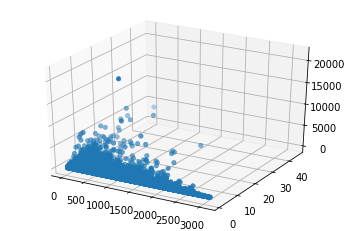

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X['r'], X['f'], X['m'], cmap='viridis', linewidth=0.5);

# k-means

## k

pou≈æijeme hodnotu √∫ƒçelov√© funkce vz√°vislosti na  ùëò, kde nam pom≈Ø≈æe knihovna yellowbrick kter√° n√°m sama najde bod zlomu

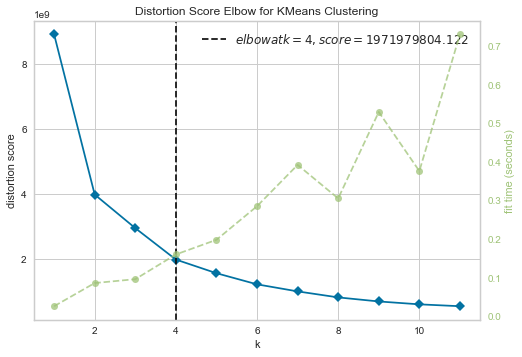

In [10]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        
visualizer.show() 

[1 0 0 ... 1 1 1]
[[2.04835141e+03 1.28341939e+00 8.42627625e+01]
 [3.30929396e+02 2.16256265e+00 1.93426093e+02]
 [1.16415478e+03 1.54822227e+00 1.21345154e+02]
 [3.20789474e+02 1.29473684e+01 4.34233474e+03]]


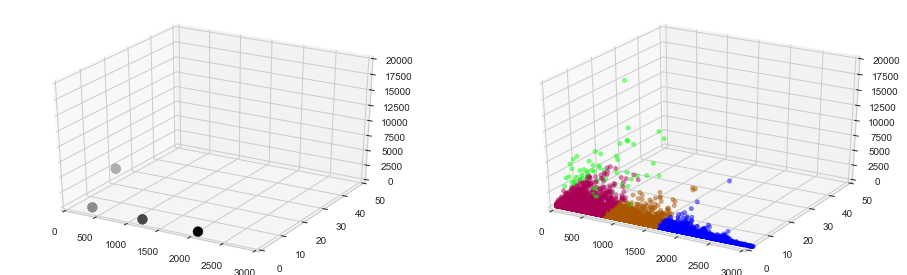

In [11]:
from sklearn.cluster import KMeans

k = 4

kmeans = KMeans(n_clusters = k, random_state = 1).fit(X)

print(kmeans.labels_)

print(kmeans.cluster_centers_)

fig = plt.figure(figsize=plt.figaspect(0.3))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.set_xlim((0,3000))
ax1.set_ylim((0,50))
ax1.set_zlim((0,20000))
ax1.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], c = 'black', s=100)

ax2.set_xlim((0,3000))
ax2.set_ylim((0,50))
ax2.set_zlim((0,20000))
ax2.scatter(X['r'], X['f'], X['m'], c=kmeans.labels_, cmap='brg', alpha=0.5)


# Silhouette

Pro n_clusters = 2 Pr≈Ømern√© Silhouette score : 0.5518760684923996
Pro n_clusters = 3 Pr≈Ømern√© Silhouette score : 0.49330160294688685
Pro n_clusters = 4 Pr≈Ømern√© Silhouette score : 0.5075624264152807
Pro n_clusters = 5 Pr≈Ømern√© Silhouette score : 0.5203005889339968
Pro n_clusters = 6 Pr≈Ømern√© Silhouette score : 0.47904824226965537


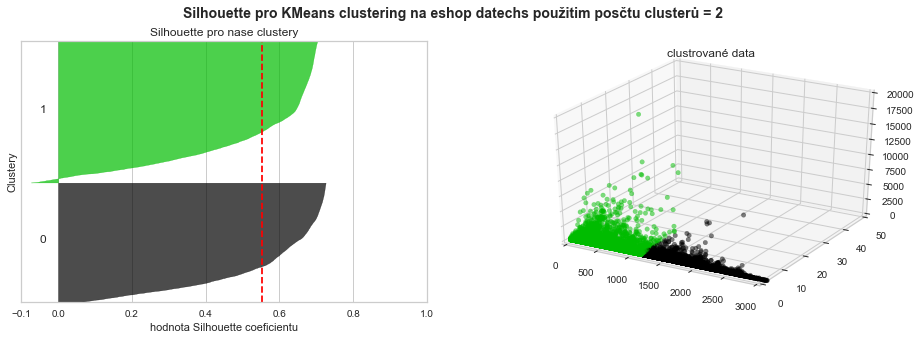

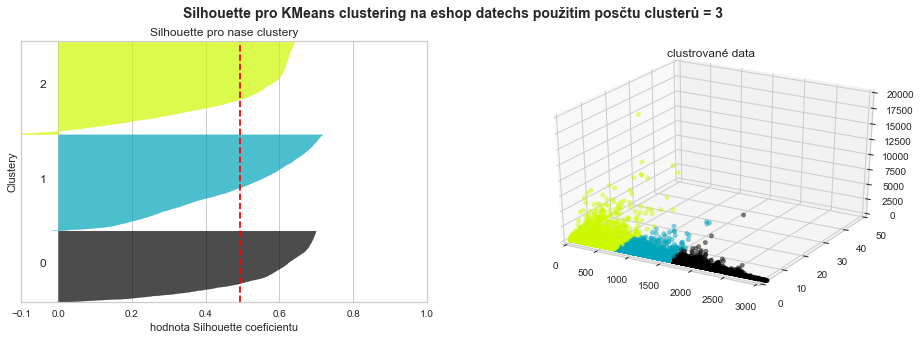

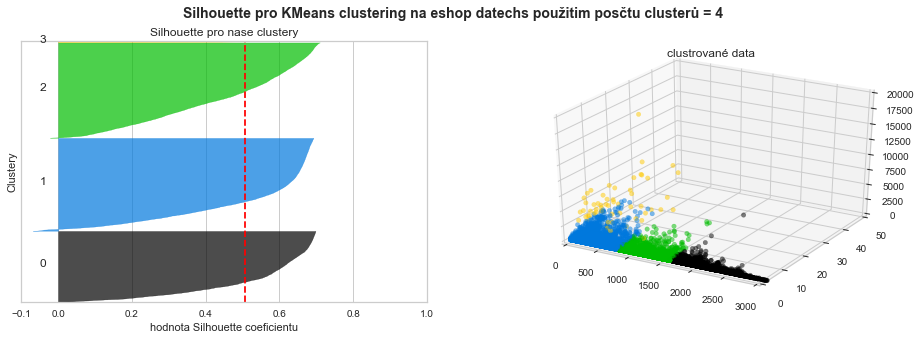

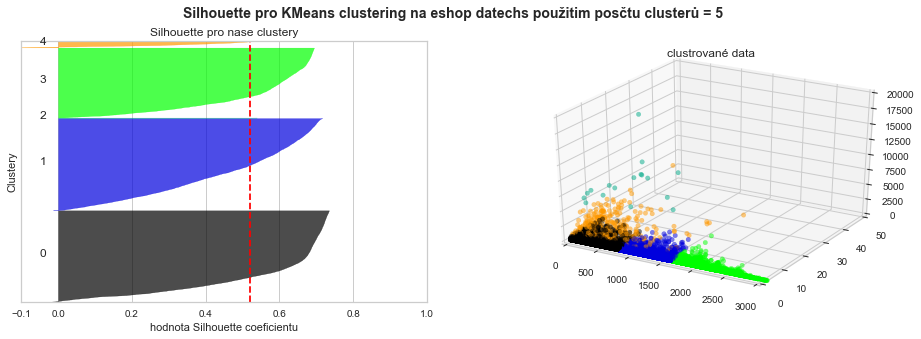

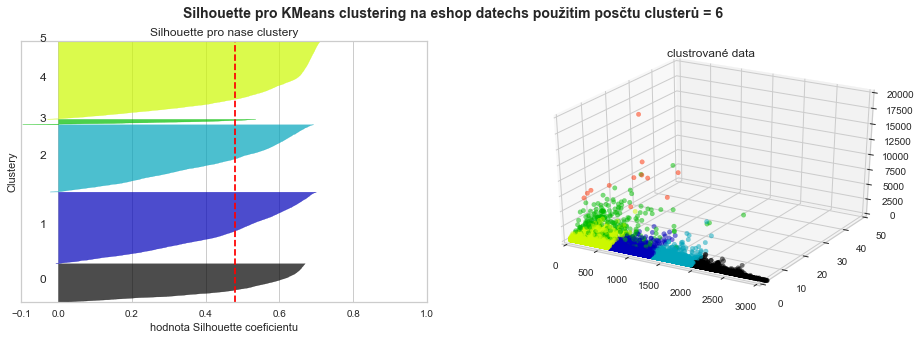

In [70]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    fig = plt.figure(figsize=plt.figaspect(0.3))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    
    #metoda Silhouette muze vyuzivat interval od -1 do 1, 
    #v tomto p≈ô√≠padƒõ si v≈°ak vystaƒç√≠m s vizualizac√≠ -0.1 do 1
    ax1.set_xlim([-0.1, 1])
    
    #pro lepsi vizualni odliseni clusteru
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    #KNN
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    #silhouette_score nam vrac√≠ p≈ô≈Ømƒõrnou hdnotu pro v≈°echny zakazn√≠ky, jak moc sed√≠ do dan√©ho clusteru
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Pro n_clusters =", n_clusters,
          "Pr≈Ømern√© Silhouette score :", silhouette_avg)

    #spoƒç√≠t√° konkr√©tn√≠ hodnoty pro z√°kazn√≠ky
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        #vezme vsechny zakazniky z daneho clusteru i a seradi je
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("Silhouette pro nase clustery")
    ax1.set_xlabel("hodnota Silhouette coeficientu")
    ax1.set_ylabel("Clustery")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.set_xlim((0,3000))
    ax2.set_ylim((0,50))
    ax2.set_zlim((0,20000))
    ax2.scatter(X['r'], X['f'], X['m'], c=colors, cmap='brg', alpha=0.5)

    ax2.set_title("clustrovan√© data")

    plt.suptitle(("Silhouette pro KMeans clustering na eshop datech"
                  "s pou≈æitim posƒçtu cluster≈Ø = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Metoda n√°m ≈ô√≠k√°, ≈æe kdy≈æ maj√≠ v≈°echny prvky vysok√© sc√≥re a nevyskytuj√≠ se zde moc ƒçasto prvky s n√≠zkou nebo z√°pornou hodnotou, tak jsem na≈°li spr√°vn√Ω poƒçet cluster≈Ø. V opaƒçn√©m p≈ô√≠padƒõ je jich bud m√°lo, nebo hodnƒõ

varianta s 2ma clustery m√° sice vysok√© ƒç√≠slo, ale pro m≈Øj uƒçel nen√≠ moc pou≈æiteln√Ω, proto≈æe to dav√° do jednoho 
clusteru z√°kazn√≠ky s p≈ô√≠li≈° odli≈°n√Ωmi 
hodnotami a velice nedostateƒçnƒõ bychom na tomto pripadƒõ hledali superstar

tud√≠≈æ n√°m nejl√©pe vych√°zej√≠ varianty pro 4 a 5 cluster≈Ø, ale varianta s 5ti m√° hodnoty s o dost vƒõt≈°√≠ z√°pornou hodnotou v 5te clusteru tud√≠≈æ bych zvolil variantu se 4mi

# Standardizace

Standardizace je zde na miste jelikoz je velk√Ω rozd√≠l v hodnot√°ch, tud√≠≈æ by se n√°m stalo, ≈æe napr parametr f by n√°m model ovlivnoval naprosto minim√°lnƒõ oproti zbyl√≠m

In [12]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

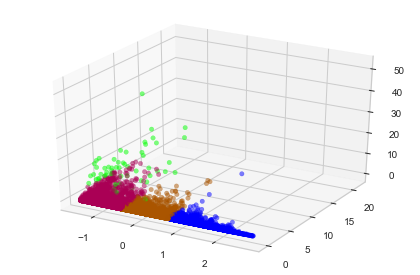

In [13]:
fig = plt.figure(figsize=plt.figaspect(0.3))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2],c=kmeans.labels_, cmap='brg', alpha=0.5)

Tohle st√°le nevypad√° nejl√≠p, proto jsem se rozhodl pro dal≈°√≠ √∫pravu tak, ze vsechny hodnoty roze≈°k√°luji do intervalu (-10 : 10)

d√≠ky tomuto se v≈°echny hodnoty dostanou do intervalu od -10 do 10

In [14]:
X_s = X_scaled

X_s[:,0] = (X_scaled[:,0] / max(X_scaled[:,0])) * 10
X_s[:,1] = (X_scaled[:,1] / max(X_scaled[:,1])) * 10
X_s[:,2] = (X_scaled[:,2] / max(X_scaled[:,2])) * 10


# k-means na standardizovan√Ωch datech

In [15]:
kmeans_s = KMeans(n_clusters = k, random_state = 1).fit(X_s)


Bohu≈æel vid√≠me, ≈æe standardizace v posledn√≠m kroku n√°m do nejlep≈°√≠ skupiny p≈ôidal i spoustu ne≈æ√°doucich z√°kazn√≠k≈Ø, kte≈ô√≠ nemaj√≠ tak dobr√© vlastnosti, tud√≠≈æ by bylo lep≈°√≠ vyu≈æ√≠t v√Ωsledek z preprocessing.StandardScaler()

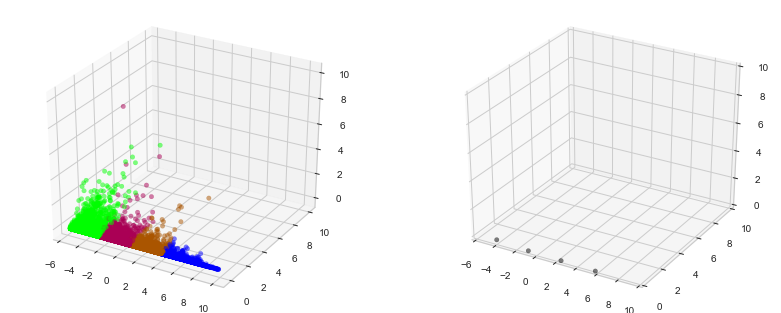

In [16]:
fig = plt.figure(figsize=plt.figaspect(0.4))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X_s[:,0], X_s[:,1], X_s[:,2],c=kmeans_s.labels_, cmap='brg', alpha=0.5)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_xlim((-6,10))
ax2.set_ylim((0,10))
ax2.set_zlim((0,10))
ax2.scatter(kmeans_s.cluster_centers_[:,0], kmeans_s.cluster_centers_[:,1], kmeans_s.cluster_centers_[:,2], c='black', cmap='brg', alpha=0.5)

# superstar

pou≈æije Euklidovskou vzd√°lenost a budeme hledat cluster, kter√Ω je nejbl√≠≈æe od bodu (min r, max f, max m), p≈ôedpokl√°d√°me pozici superz√°kazn√≠ka, kter√Ω je ve v≈°em nejlep≈°√≠.

In [44]:
min_r = max(min(X.r), 1)
max_f = max(X.f)
max_m = max(X.m)

def euklid(cluster):
    return ((min_r - cluster[0]) / min_r )**2 + ((max_f - cluster[1]) / max_f)**2 + ((max_m - cluster[2]) / max_m)**2

1 45 21392.379999999997


nejmensi vzdalenost od naseho idealu

In [55]:
mini = 1000000
ind = 0
for i in range(0, len(kmeans.cluster_centers_)):
    if(euklid(kmeans.cluster_centers_[i]) < mini):
        ind = i
        mini = euklid(kmeans.cluster_centers_[i])
print(ind)

3


# vysledne superstar

ted u≈æ je to zobrazeno jen na nep≈ôescalovan√Ωch datech

In [46]:
superstar_rfm = rfm[kmeans.labels_ == ind]
other_rfm = rfm[kmeans.labels_ != ind]

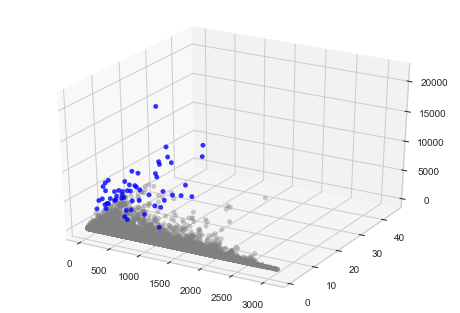

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(superstar_rfm['r'], superstar_rfm['f'], superstar_rfm['m'], c='blue', alpha=0.8)
ax.scatter(other_rfm['r'], other_rfm['f'], other_rfm['m'], c='gray', alpha=0.4)